In [21]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pathTrain = os.getcwd() + '\TestSet\PercTrain.csv'

In [97]:
data = pd.read_csv(pathTrain)
Y = data[["y"]]
X = data[["ft1", "ft2"]]
X.insert(0, "b", 1)

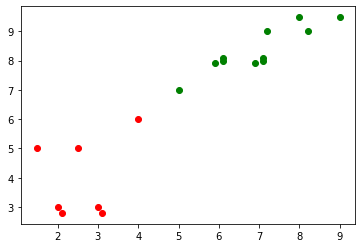

In [98]:
plt.scatter(data["ft1"].loc[data["y"]==1], data["ft2"].loc[data["y"]==1], c="green")
plt.scatter(data["ft1"].loc[data["y"]==-1], data["ft2"].loc[data["y"]==-1], c="red")

Perceptron:

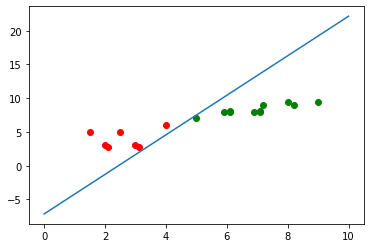

In [127]:
n = X.shape[0]
d = X.shape[1]
Niter = 69
alpha = 0.1
x = np.array(X)
y = Y.to_numpy()
W = np.zeros((d,1))
for t in range(Niter):
    #Looking for a misclassified item
    for i in range(n):
        xi = x[i,:].reshape(d,1)
        fxi = np.dot(xi.T, W)
        
        if fxi*y[i] <= 0:
#             print("F(x)={0}, y={1}".format(fxi, y[i]))
#             print(W)
#             print(alpha*y[i]*xi)
            W = W + alpha*y[i]*xi
            #print(W)
            break

plt.scatter(data["ft1"].loc[data["y"]==1], data["ft2"].loc[data["y"]==1], c="green")
plt.scatter(data["ft1"].loc[data["y"]==-1], data["ft2"].loc[data["y"]==-1], c="red")
xplt = [0, 10]
plt.plot(xplt, -W[1]*xplt/W[2]-W[0]/W[2])

Logistic regression:

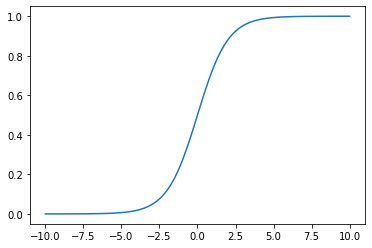

In [109]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
a = np.linspace(-10,10,100)
plt.plot(a, sigmoid(a))

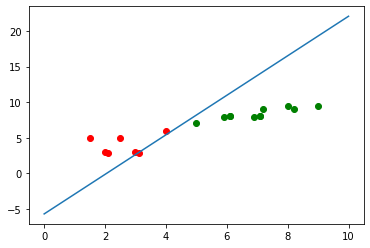

In [128]:
n = X.shape[0]
d = X.shape[1]
Niter = 69
alpha = 1
x = np.array(X)
y = Y.to_numpy()
W = np.zeros((d,1))
for t in range(Niter):
    #Looking for a misclassified item
    grad = 0
    for i in range(n):
        xi = x[i,:].reshape(d,1)
        fxi = np.dot(xi.T, W)
        sigi = sigmoid(fxi*y[i])
        grad += (1-sigi)*y[i]*xi
    W = W + alpha*grad

plt.scatter(data["ft1"].loc[data["y"]==1], data["ft2"].loc[data["y"]==1], c="green")
plt.scatter(data["ft1"].loc[data["y"]==-1], data["ft2"].loc[data["y"]==-1], c="red")
xplt = [0, 10]
plt.plot(xplt, -W[1]*xplt/W[2]-W[0]/W[2])

Gaussian Process

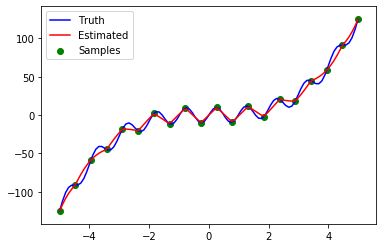

In [207]:
#Truth
def fun(a):
    return a**3+10*np.sin(2*np.pi*a)
Neval = 100
Nsamples = 20
x = np.linspace(-5,5,Neval)
fx = fun(x)
plt.plot(x, fx, c = "blue", label="Truth")
xs = np.linspace(-5,5,Nsamples)
ys = fun(xs).reshape(Nsamples, 1)
plt.scatter(xs, ys, c = "green", label="Samples")

b = 1
def ker(p, q):
    return np.exp(-abs(p-q)/b)
def Kmat(v):
    n = len(v)
    K = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            K[i,j] = ker(v[i], v[j])
    return K
def Kvec(a, v):
    n = len(v)
    K = np.zeros((1,n))
    for i in range(n):
        K[0,i] = ker(a, v[i])
    return K

#Rebuild:
Kn = Kmat(xs)
invKn = np.linalg.inv(Kn)
y_estimated = np.zeros((Neval,1))
for i in range(Neval):
    KxiD = Kvec(x[i], xs)
    y_estimated[i] = np.dot(KxiD, np.dot(invKn, ys))
plt.plot(x, y_estimated, c = "red", label="Estimated")
plt.legend()